In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from datetime import datetime
import json
from underthesea import word_tokenize

In [2]:
train_df = pd.read_csv('public_train.csv')
test_df = pd.read_csv('public_test.csv')

In [3]:
train_df.describe()

,id,label
count,4372.000000,4372.000000
mean,2186.500000,0.167887
std,1262.232018,0.373808
min,1.000000,0.000000
25%,1093.750000,0.000000
50%,2186.500000,0.000000
75%,3279.250000,0.000000
max,4372.000000,1.000000


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4372 entries, 0 to 4371
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                4372 non-null   int64 
 1   user_name         4372 non-null   object
 2   post_message      4371 non-null   object
 3   timestamp_post    4276 non-null   object
 4   num_like_post     4257 non-null   object
 5   num_comment_post  4362 non-null   object
 6   num_share_post    3647 non-null   object
 7   label             4372 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 273.4+ KB


In [5]:
def extract_number(s):
    if (type(s) == str):
        if (len(re.findall('(?:[+-]?(?:[0-9]+))', s)) > 0):
            print(s)
            return int(re.findall('(?:[+-]?(?:[0-9]+))', s)[0])
        else:
            return -999
    else:
        return s
    
def is_digit(n):
    try:
        float(n)
        return True
    except ValueError:
        return  False
    
def handle_num_like_post(s):
    if (type(s) == str):
        if ('like' in s):
            return int(s.split(" ")[0])
        if (not is_digit(s)):
            return -999
        else:
            return s
    return s

def handle_num_comment_post(s):
    if (type(s) == str):
        if ('comment' in s):
            return int(s.split(" ")[0])
        if (not is_digit(s)):
            return -999
        else:
            return s
    return s

def handle_num_share_post(s):
    if (type(s) == str):
        if ('share' in s):
            return int(s.split(" ")[0])
        if (not is_digit(s)):
            return -999
        else:
            return s
    return s
                
            
        

In [6]:
fe_train_df = train_df.copy()

fe_train_df[['num_like_post', 'num_comment_post', 'num_share_post']] = fe_train_df[['num_like_post', 'num_comment_post', 'num_share_post']].replace('unknown', np.nan)
fe_train_df[['num_like_post', 'num_comment_post', 'num_share_post']] = fe_train_df[['num_like_post', 'num_comment_post', 'num_share_post']].fillna('-999')

In [7]:
fe_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4372 entries, 0 to 4371
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                4372 non-null   int64 
 1   user_name         4372 non-null   object
 2   post_message      4371 non-null   object
 3   timestamp_post    4276 non-null   object
 4   num_like_post     4372 non-null   object
 5   num_comment_post  4372 non-null   object
 6   num_share_post    4372 non-null   object
 7   label             4372 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 273.4+ KB


<AxesSubplot:>

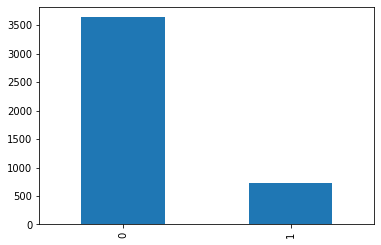

In [8]:
fe_train_df['label'].value_counts().plot(kind='bar')

In [9]:
fe_train_df.loc[~fe_train_df['num_like_post'].apply(is_digit), :]

,id,user_name,post_message,timestamp_post,num_like_post,num_comment_post,num_share_post,label
81,82,f8584733a5e8e99a9b45ebb5400e796e,MU nhuộm đỏ thành Manchester,Ronaldo lập cột mốc khó tin,Solskjaer hạ knock-out Guardiola,Juventus bỏ xa Inter Milan... là những ảnh ch...,1583713929.0,0
1712,1713,c25879ff6975b91d35be50379b90177a,Giá vàng hôm nay: Tăng hơn 1 triệu đồng mỗi lượng,Giá vàng thế giới vọt 3% sau khi FED hạ lãi suất,Ngang nhiên chiếm dụng đất dự án hồ Yên Sở là...,1583307918,7.0,0
1833,1834,7ac71da7c5675e5758bf798fa4b344d5,Hôm nay ra chợ em đã nghe mọi người kháo nhau....,1584514800.0,54 like,20,12,1
3172,3173,c9345dce3690bf6c775fca746467ff84,Vụ voi ăn dứa nhồi pháo: Kết quả điều tra chín...,Công bố phát hiện bất ngờ về COVID-19 ở Vũ Hán,Kết quả phiên xử đầu tiên cảnh sát Mỹ ghì chế...,1591690549,9.0,0
3490,3491,c9345dce3690bf6c775fca746467ff84,Nhiều quốc gia đặt mua kit xét nghiệm COVID-19...,2 bệnh nhân mắc COVID-19 nặng ở Việt Nam tiến...,Thế giới đẩy nhanh tốc độ phát triển vaccine ...,1584428863,53.0,0


In [10]:
fe_train_df.loc[~fe_train_df['num_comment_post'].apply(is_digit), :]

,id,user_name,post_message,timestamp_post,num_like_post,num_comment_post,num_share_post,label
81,82,f8584733a5e8e99a9b45ebb5400e796e,MU nhuộm đỏ thành Manchester,Ronaldo lập cột mốc khó tin,Solskjaer hạ knock-out Guardiola,Juventus bỏ xa Inter Milan... là những ảnh ch...,1583713929.0,0
189,190,a2ed99660efc25ebf7dd8947c046fd4c,Hà Nội đã hoãn giải đua F1 do dịch Covid-19,1583595360.0,29,1 comment,0,0
298,299,6585dc84a464f35eb5dbbf7dc2c4ce2a,Phó Chủ tịch Thường trực UBND TPHCM Lê Thanh L...,1585559940.0,16,1 comment,0,1
2278,2279,d089c8b4589107ad5d44620c09e1e348,NGHI NGỜ VIRUS 2019-nCoV LÀ VŨ KHÍ SINH HỌC.\n...,1580885280.0,20,1 comment,6,1
2719,2720,da714923622c349f0c40eab8ef52db95,"""Thảo nào tôi đã không bị rụng tóc"" - Tổng thố...",1601315280.0,120,10 comment,2,1
3212,3213,fba7ff4245f1a93bca836e76a079543c,Lô thuốc đầu tiên chữa khỏi bệnh viêm phổi vi...,1584542160.0,12,1 comment,0,1
3538,3539,82636849e8933b59ebab10bc26cc59fc,Thời gian qua dịch tả lợn Chây Phi đang gây ản...,1551688080.0,116,12 comment,0,1
3812,3813,db57e36c04a7f6c9b09a6c4ad2e42e21,"NẾU AI ĐỊNH ĐI DU LỊCH, ĐẶT VÉ MÁY BAY THÌ HAY...",1595999160.0,10,1 comment,0,1


In [11]:
fe_train_df.loc[~fe_train_df['num_share_post'].apply(is_digit), :]

,id,user_name,post_message,timestamp_post,num_like_post,num_comment_post,num_share_post,label
388,389,16244723c53210008d58c2f9f2b14d29,Mọi người cảnh giác nhé… trưa hôm nay cô mình ...,1552226820.0,91,33,1 share,1
921,922,4196a8c1ae87dfaa0a3b0bbde0a27ea1,"Thuốc chữa sốt rét chữa Covid-19. Ở Mỹ, Trung ...",1584992460.0,55,24,1 share,1
1110,1111,fbf45c6879a5296c35d75a08e123ada6,Nhóm du khách Hàn Quốc sau khi từ chối cách ly...,1582729860.0,32,22,1 share,1
1971,1972,ef234a7d1cb1287d90ad6637d5477d8e,Bcao cô và các bố mẹ! E vừa dự cuộc họp khẩn c...,1584519300.0,55,4,1 share,1
2214,2215,5d2a87198d6585eb5c99edaab4e64fae,Ngay cả khi vi-rút xâm nhập vào miệng bạn ... ...,1582995240.0,17,2,1 share,1
2842,2843,96b7f52c620680c848f55e7cb6e3e90f,"Anh Hồ Văn L., gia đình có 9 nhân khẩu, nhận đ...",NaN,49,172,"June 11th 2020, 19:03:45.000",0
3145,3146,9c0ff8ea15daad3962d716b684063cd6,BÀI THUỐC MỖI SÁNG KHIẾN TÔI KHỎE MẠNH\n\nKhuy...,1588160100.0,10,5,1 share,1
3839,3840,f73c2f9fa7a45d5caa67c5f5a10547e8,Người đàn ông Hồi giáo tươi cười khi nhà thờ Đ...,1586963340.0,82,13,1 share,1
3923,3924,4383ac6c2c195030d08f7769674ba2a7,Trung Quốc muốn Ý mua lại chính vật tư y tế tr...,1586294220.0,30,18,1 share,1
4036,4037,9515e17e4fd91a7165c6f0226a2e94d1,Sở GD&ĐT Hải Phòng đã có chỉ đạo tới các trườn...,NaN,-999,1,"May 25th 2020, 21:57:58.000",0


In [12]:
fe_train_df.loc[~fe_train_df['timestamp_post'].apply(is_digit), :]

,id,user_name,post_message,timestamp_post,num_like_post,num_comment_post,num_share_post,label
81,82,f8584733a5e8e99a9b45ebb5400e796e,MU nhuộm đỏ thành Manchester,Ronaldo lập cột mốc khó tin,Solskjaer hạ knock-out Guardiola,Juventus bỏ xa Inter Milan... là những ảnh ch...,1583713929.0,0
591,592,f0ada4801309678b82743587f9b9c5f2,Học sinh từ lớp 5 trở lên đi học trở lại từ ng...,từ lớp 1 đến lớp 4 tiếp tục đi học từ ngày ...,1587881185,24,1.0,0
1712,1713,c25879ff6975b91d35be50379b90177a,Giá vàng hôm nay: Tăng hơn 1 triệu đồng mỗi lượng,Giá vàng thế giới vọt 3% sau khi FED hạ lãi suất,Ngang nhiên chiếm dụng đất dự án hồ Yên Sở là...,1583307918,7.0,0
1923,1924,c9345dce3690bf6c775fca746467ff84,2 thanh niên nhập viện cấp cứu sau tai nạn liê...,Hà Nội: Nguy hiểm cận kề từ họp chợ tràn ra l...,1592283607,4,0.0,0
2592,2593,43c8a5fff1569c42948813f533e5cf24,Bản tin cập nhật tình hình dịch bệnh do Virus ...,Nhộn nhịp mùa đánh bắt cá mú đỏ…,1585172827,1276,2.0,0
3172,3173,c9345dce3690bf6c775fca746467ff84,Vụ voi ăn dứa nhồi pháo: Kết quả điều tra chín...,Công bố phát hiện bất ngờ về COVID-19 ở Vũ Hán,Kết quả phiên xử đầu tiên cảnh sát Mỹ ghì chế...,1591690549,9.0,0
3490,3491,c9345dce3690bf6c775fca746467ff84,Nhiều quốc gia đặt mua kit xét nghiệm COVID-19...,2 bệnh nhân mắc COVID-19 nặng ở Việt Nam tiến...,Thế giới đẩy nhanh tốc độ phát triển vaccine ...,1584428863,53.0,0
4219,4220,c9345dce3690bf6c775fca746467ff84,Vợ Đường Nhuệ vừa bị khởi tố thêm tội danh gì,Một hộ dân “sốc” với gần 90 triệu tiền điện t...,1592811050,11,0.0,0


In [13]:
fe_train_df[fe_train_df['timestamp_post'].isna()]

,id,user_name,post_message,timestamp_post,num_like_post,num_comment_post,num_share_post,label
21,22,5eddcdd37c084d4528f89af39c1f4337,Cục Quản lý sản phẩm y tế quốc gia Trung Quốc ...,NaN,4700,549,3300,0
142,143,93ea646ee2b3e4a11eb4e516b41efaba,Dịch Covid-19: Trung Quốc lần đầu thừa nhận có...,NaN,9400,939,3400,1
167,168,0f2bcbfdc6de2f21e68c0026a3a14441,"5 năm trước, Bill Gates đã công khai cảnh báo ...",NaN,3700,277,4700,0
184,185,907f1fdcf852bedc51dfd6e11a81f273,"Gửi đến vị ""tướng tư lệnh"" trong cuộc chiến ch...",NaN,10000,657,4700,0
232,233,28a7bf4c68263f9d9068778ec3b8de93,"""Chúng ta cách ly Vũ Hán, nhưng đừng cách ly t...",NaN,23000,1300,4800,0
...,...,...,...,...,...,...,...,...
4195,4196,b2d8d985c06b203fed093e52008aa64f,PHÁT MIỄN PHÍ HÀNG TRIỆU KHẨU TRANG VẢI ĐỂ NGƯ...,NaN,3000,974,4300,0
4223,4224,1e44dc26ec7db8eb95fe352ff385b2c5,"🇻🇳🇻🇳🇻🇳🇻🇳 'Việt Nam hỡi, Việt Nam ơi! Cùng đoà...",NaN,1100,109,2200,0
4257,4258,50d80468b93b3eaaa6f907f6d5274022,"Moderna Therapetics, một công ty công nghệ sin...",NaN,18000,1300,26000,0
4302,4303,c76936b0e080d87f5ea552844b158da1,"Fang Bin, một cư dân Vũ Hán, đã bí mật gắn máy...",NaN,4400,976,4400,1


In [14]:
fe_train_df['num_like_post'] = fe_train_df['num_like_post'].apply(handle_num_like_post).astype(float)
fe_train_df['num_comment_post'] = fe_train_df['num_comment_post'].apply(handle_num_comment_post).astype(float)
fe_train_df['num_share_post'] = fe_train_df['num_share_post'].apply(handle_num_share_post).astype(float)

In [15]:
fe_train_df.loc[fe_train_df['num_like_post'] > 150000000, 'timestamp_post'] = fe_train_df[fe_train_df['num_like_post'] > 150000000]['num_like_post']
fe_train_df.loc[fe_train_df['num_like_post'] > 150000000, 'num_like_post'] = -999

fe_train_df.loc[fe_train_df['num_comment_post'] > 150000000, 'timestamp_post'] = fe_train_df[fe_train_df['num_comment_post'] > 150000000]['num_comment_post']
fe_train_df.loc[fe_train_df['num_comment_post'] > 150000000, 'num_comment_post'] = -999

fe_train_df.loc[fe_train_df['num_share_post'] > 150000000, 'timestamp_post'] = fe_train_df[fe_train_df['num_share_post'] > 150000000]['num_share_post']
fe_train_df.loc[fe_train_df['num_share_post'] > 150000000, 'num_share_post'] = -999

In [16]:
fe_train_df.describe()

,id,num_like_post,num_comment_post,num_share_post,label
count,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000
mean,2186.500000,2062.682296,151.776532,393.295288,0.167887
std,1262.232018,7443.865022,872.254998,2248.068926,0.373808
min,1.000000,-999.000000,-999.000000,-999.000000,0.000000
25%,1093.750000,6.000000,0.000000,0.000000,0.000000
50%,2186.500000,38.000000,3.000000,3.000000,0.000000
75%,3279.250000,418.250000,33.000000,48.000000,0.000000
max,4372.000000,140000.000000,22000.000000,37783.000000,1.000000


Text(0.5, 1.0, 'Label = 1 Num_share_post')

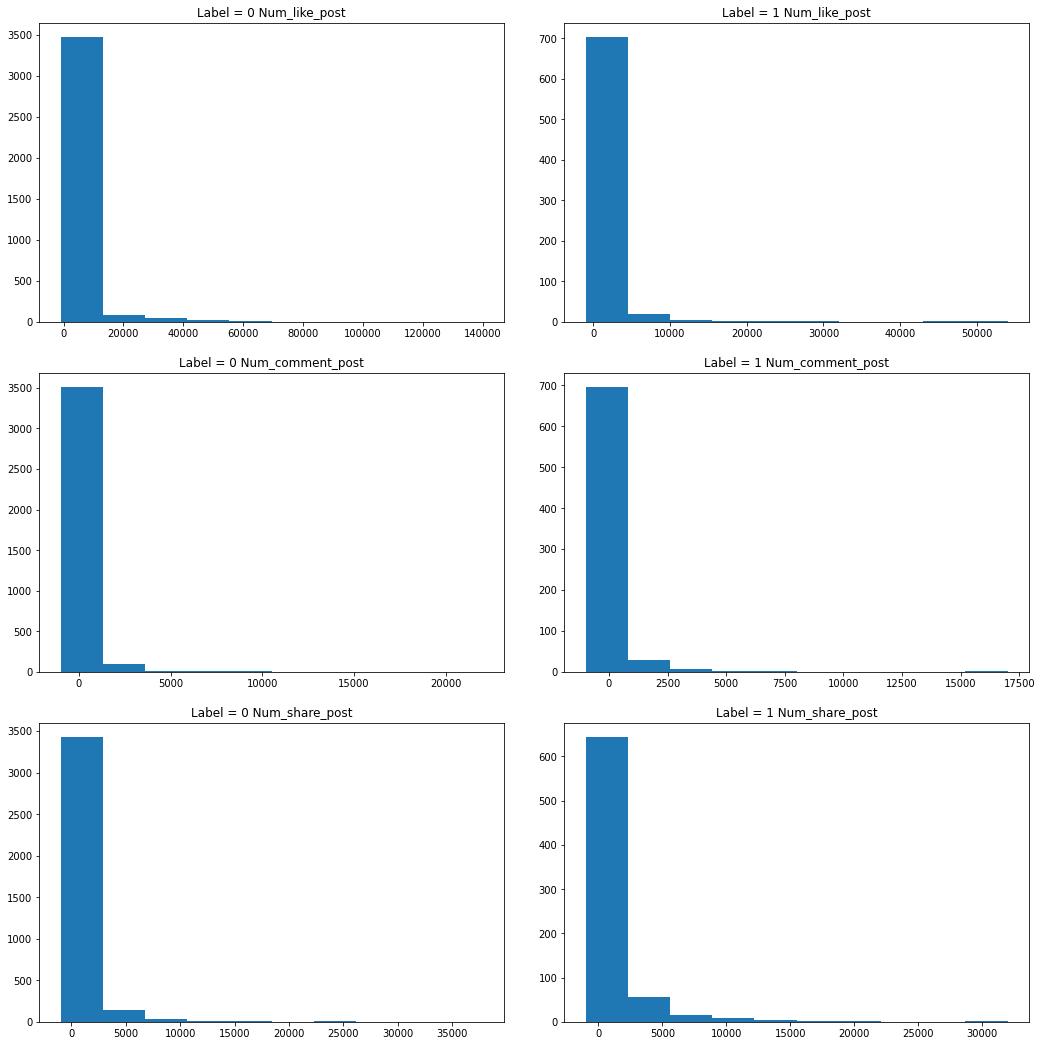

In [17]:
fig, ax = plt.subplots(3, 2, figsize=(15,15))
fig.tight_layout(pad=3.0)
ax[0, 0].hist(fe_train_df[fe_train_df['label'] == 0]['num_like_post'])
ax[0, 0].set_title('Label = 0 Num_like_post')
ax[0, 1].hist(fe_train_df[fe_train_df['label'] == 1]['num_like_post'])
ax[0, 1].set_title('Label = 1 Num_like_post')
ax[1, 0].hist(fe_train_df[fe_train_df['label'] == 0]['num_comment_post'])
ax[1, 0].set_title('Label = 0 Num_comment_post')
ax[1, 1].hist(fe_train_df[fe_train_df['label'] == 1]['num_comment_post'])
ax[1, 1].set_title('Label = 1 Num_comment_post')

ax[2, 0].hist(fe_train_df[fe_train_df['label'] == 0]['num_share_post'])
ax[2, 0].set_title('Label = 0 Num_share_post')
ax[2, 1].hist(fe_train_df[fe_train_df['label'] == 1]['num_share_post'])
ax[2, 1].set_title('Label = 1 Num_share_post')

In [18]:
fe_train_df['user_name'].nunique()

3233

In [19]:
unique_user = fe_train_df['user_name'].value_counts()

In [20]:
multi_post_user = fe_train_df[fe_train_df['user_name'].apply(lambda x: x in unique_user[unique_user > 1].keys())]

<AxesSubplot:xlabel='count', ylabel='mean'>

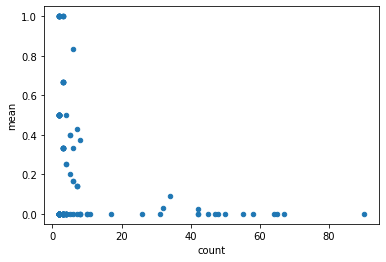

In [21]:
multi_post_user.groupby('user_name')['label'].agg(['count', 'mean']).sort_values(by='count', ascending=False).plot(kind='scatter', x='count', y='mean')

In [22]:
fe_train_df['timestamp_post'] = fe_train_df['timestamp_post'].astype(float)

In [23]:
datetime.utcfromtimestamp(fe_train_df['timestamp_post'].min()).strftime("%Y-%m-%d %H:%M:%S")

'2014-01-02 14:42:00'

In [24]:
datetime.utcfromtimestamp(fe_train_df['timestamp_post'].max()).strftime("%Y-%m-%d %H:%M:%S")

'2020-09-28 17:48:00'

In [25]:
fe_train_df['post_message'].fillna("", inplace=True)

In [26]:
fe_train_df['len_post_message'] = [len(t) for t in fe_train_df['post_message']]

{'whiskers': [<matplotlib.lines.Line2D at 0x7fee7d9e9220>,
 'caps': [<matplotlib.lines.Line2D at 0x7fee7d9e98e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fee7da5be80>],
 'medians': [<matplotlib.lines.Line2D at 0x7fee7d9e9fa0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fee7d9f3340>],
 'means': []}

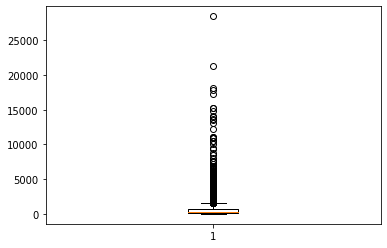

In [27]:
plt.boxplot(fe_train_df['len_post_message'])

In [28]:
print("Min len post message: ", fe_train_df['len_post_message'].min())
print("Max len post message: ", fe_train_df['len_post_message'].max())

Min len post message:  0
Max len post message:  28453


In [29]:
fe_train_df['clean_post_message'] = fe_train_df['post_message']

In [30]:
def count_url(s):
    pattern = r'<URL>'
    if (type(s) == str):
        return len(re.findall(pattern, s))
    return 0

fe_train_df['num_url_in_post_message'] = fe_train_df['clean_post_message'].apply(count_url)

In [31]:
print("Mean num_url_in_post_message when label = 1: ", fe_train_df[fe_train_df['label'] == 1]['num_url_in_post_message'].mean())

Mean num_url_in_post_message when label = 1:  0.2111716621253406


In [32]:
print("Mean num_url_in_post_message when label = 0: ", fe_train_df[fe_train_df['label'] == 0]['num_url_in_post_message'].mean())

Mean num_url_in_post_message when label = 0:  0.46261682242990654


In [81]:
def count_phone(s):
    pattern = r'<PHONE>'
    if (type(s) == str):
        return len(re.findall(pattern, s))
    return 0

fe_train_df['num_phone_in_post_message'] = fe_train_df['clean_post_message'].apply(count_url)

In [82]:
print("Mean num_phone_in_post_message when label = 1: ", fe_train_df[fe_train_df['label'] == 1]['num_phone_in_post_message'].mean())

Mean num_phone_in_post_message when label = 1:  0.2111716621253406


In [83]:
print("Mean num_url_in_phone_message when label = 0: ", fe_train_df[fe_train_df['label'] == 0]['num_phone_in_post_message'].mean())

Mean num_url_in_phone_message when label = 0:  0.46261682242990654


In [85]:
fe_train_df.describe()

,id,timestamp_post,num_like_post,num_comment_post,num_share_post,label,len_post_message,num_url_in_post_message,num_bold_char_in_message,num_phone_in_post_message
count,4372.000000,4.276000e+03,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000
mean,2186.500000,1.587346e+09,2062.682296,151.776532,393.295288,0.167887,747.548490,0.420403,14.239707,0.420403
std,1262.232018,7.152449e+06,7443.865022,872.254998,2248.068926,0.373808,1471.899903,1.089172,220.744313,1.089172
min,1.000000,1.388674e+09,-999.000000,-999.000000,-999.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1093.750000,1.584667e+09,6.000000,0.000000,0.000000,0.000000,138.000000,0.000000,0.000000,0.000000
50%,2186.500000,1.587783e+09,38.000000,3.000000,3.000000,0.000000,233.000000,0.000000,0.000000,0.000000
75%,3279.250000,1.590729e+09,418.250000,33.000000,48.000000,0.000000,705.500000,0.000000,0.000000,0.000000
max,4372.000000,1.601315e+09,140000.000000,22000.000000,37783.000000,1.000000,28453.000000,15.000000,13322.000000,15.000000


In [33]:
# pattern = r'\*\*(.*?)\*\*'
# p = re.compile(pattern)
# t = p.findall(r"** scascasd ** ** cuoc song toi**")
# r = 0
# r += i for i in len(t)
# len(re.findall(pattern, test))

In [34]:
def markdown_bold_style(s):
    if (type(s) == str):
        pattern = r'\*\*(.*?)\*\*'
        p = re.compile(pattern)
        temp = p.findall(s)
        num_bold = 0
        for i in temp:
            num_bold += len(i)
        return num_bold
    return 0

In [35]:
fe_train_df['num_bold_char_in_message'] = fe_train_df['clean_post_message'].apply(markdown_bold_style)

In [36]:
fe_train_df.describe()

,id,timestamp_post,num_like_post,num_comment_post,num_share_post,label,len_post_message,num_url_in_post_message,num_bold_char_in_message
count,4372.000000,4.276000e+03,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000
mean,2186.500000,1.587346e+09,2062.682296,151.776532,393.295288,0.167887,747.548490,0.420403,14.239707
std,1262.232018,7.152449e+06,7443.865022,872.254998,2248.068926,0.373808,1471.899903,1.089172,220.744313
min,1.000000,1.388674e+09,-999.000000,-999.000000,-999.000000,0.000000,0.000000,0.000000,0.000000
25%,1093.750000,1.584667e+09,6.000000,0.000000,0.000000,0.000000,138.000000,0.000000,0.000000
50%,2186.500000,1.587783e+09,38.000000,3.000000,3.000000,0.000000,233.000000,0.000000,0.000000
75%,3279.250000,1.590729e+09,418.250000,33.000000,48.000000,0.000000,705.500000,0.000000,0.000000
max,4372.000000,1.601315e+09,140000.000000,22000.000000,37783.000000,1.000000,28453.000000,15.000000,13322.000000


In [37]:
print("Mean num_bold_char_in_message when label = 1: ", fe_train_df[fe_train_df['label'] == 1]['num_bold_char_in_message'].mean())

Mean num_bold_char_in_message when label = 1:  15.544959128065395


In [38]:
print("Mean num_bold_char_in_message when label = 0: ", fe_train_df[fe_train_df['label'] == 0]['num_bold_char_in_message'].mean())

Mean num_bold_char_in_message when label = 0:  13.976360637713029


In [68]:
emoji_dict = dict()
with open('./emoji_dict.json', 'r') as f:
    emoji_dict = json.load(f)

In [72]:
def replaceEmoji(s):
    if (type(s) == str):
        global emoji_dict
        s_clean = s
        for e in emoji_dict.keys():
            s_clean = s_clean.replace(e, emoji_dict[e])
        return s_clean
    return s

In [73]:
fe_train_df['clean_post_message'] = fe_train_df['clean_post_message'].apply(replaceEmoji)

In [80]:
fe_train_df[fe_train_df['id'] == 27][['post_message', 'clean_post_message']]

,post_message,clean_post_message
26,📣 SÁNG NAY KHÔNG CÓ CA MẮC MỚI\n\n🦠 Tổng số ca...,loa phóng thanh SÁNG NAY KHÔNG CÓ CA MẮC MỚI\n...


In [90]:
word_tokenize("Bình                Dương: Thanh tra Sở              Xây dựng phát hiện dự án 25 tầng của Công ty Tường Phong xây dựng sai giấy phép Vừa qua, Thanh tra Sở Xây dựng tỉnh Bình Dương phát hiện Công ty TNHH Xây dựng – Dịch vụ thương mại đầu tư bất động sản Tường Phong (Công ty Tường Phong) chủ đầu tư dự án khu nhà ở thương mại dịch vụ Contentment Plaza (Roxana Plaza) “quên” xây 2 tầng hầm và xây dựng diện tích không đúng theo giấy phép xây dựng đã được cấp.", format="text")

'Bình_Dương : Thanh_tra Sở Xây_dựng phát_hiện dự_án 25 tầng của Công_ty Tường_Phong xây_dựng sai giấy_phép Vừa_qua , Thanh_tra Sở Xây_dựng tỉnh Bình_Dương phát_hiện Công_ty TNHH Xây_dựng – Dịch_vụ thương_mại đầu_tư bất_động_sản Tường_Phong ( Công_ty Tường_Phong ) chủ đầu_tư dự_án khu nhà ở thương_mại dịch_vụ Contentment_Plaza ( Roxana_Plaza ) “ quên ” xây 2 tầng_hầm và xây_dựng diện_tích không đúng theo giấy_phép xây_dựng đã được cấp .'

In [98]:
def miscClean(s):
    remove_misc_s = s.replace('<URL>', '')
    remove_misc_s = remove_misc_s.replace('<PHONE>', '')
    remove_misc_s = re.sub("[^a-z0-9A-Z_ÀÁÂÃÈÉÊÌÍÒÓÔÕÙÚĂĐĨŨƠàáâãèéêìíòóôõùúăđĩũơƯĂẠẢẤẦẨẪẬẮẰẲẴẶẸẺẼỀỀỂưăạảấầẩẫậắằẳẵặẹẻẽềềểỄỆỈỊỌỎỐỒỔỖỘỚỜỞỠỢỤỦỨỪễệỉịọỏốồổỗộớờởỡợụủứừỬỮỰỲỴÝỶỸửữựỳỵỷỹ ]", "", remove_misc_s)
    remove_misc_s = remove_misc_s.lower()
    
    remove_misc_s = word_tokenize(remove_misc_s, format='text')
    
    return remove_misc_s

# miscClean('Phía nguyên đơn yêu cầu tòa xem xét hủy toàn bộ quyết định của UBND <URL> về việc công nhận Hội đồng quản trị Trường đại học Hoa Sen. #đạihọcHoaSen')

In [99]:
fe_train_df['clean_post_message'] = fe_train_df['clean_post_message'].apply(miscClean)

In [100]:
fe_train_df

,id,user_name,post_message,timestamp_post,num_like_post,num_comment_post,num_share_post,label,len_post_message,clean_post_message,num_url_in_post_message,num_bold_char_in_message,num_phone_in_post_message
0,1,389c669730cb6c54314a46be785cea42,"THĂNG CẤP BẬC HÀM ĐỐI VỚI 2 CÁN BỘ, CHIẾN SỸ H...",1.585945e+09,19477.0,378.0,173.0,0,1057,thăng cấp_bậc hàm đối_với 2 cán_bộ chin sỹ hy_...,0,0,0
1,2,775baa6d037b6d359b229a656eaeaf08,<URL>,1.588939e+09,11.0,5.0,3.0,0,5,,1,0,1
2,3,b9f3394d2aff86d85974f5040c401f08,TƯ VẤN MÙA THI: Cách nộp hồ sơ để trúng tuyển ...,1.591405e+09,48.0,5.0,19.0,0,334,tư_vấn mùa thi cách nộp hồ_sơ để trúng_tuyển c...,1,0,1
3,4,808e278b22ec6b96f2faf7447d10cd8e,Cơ quan Cạnh tranh và Thị trường Anh quyết địn...,1.592024e+09,3.0,0.0,0.0,0,142,cơ_quan cạnh_tranh và thị_trường anh quyt định...,0,0,0
4,5,f81bdd6d8be4c5f64bb664214e47aced,Thêm 7 ca tại Quảng Nam liên quan đến hành khá...,1.583737e+09,775.0,0.0,54.0,0,130,thêm 7 ca tại quảng_nam liên_quan đn hành_khác...,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4367,4368,20933f35ef5d22b4d8193cc269c8ff1e,BÀ MẸ VIỆT NAM ANH HÙNG 95 TUỔI MAY KHẨU TRANG...,1.584795e+09,5800.0,1300.0,12000.0,0,1347,bà mẹ việt nam anh_hùng 95 tuổi may khẩu_trang...,1,0,1
4368,4369,a117312f796a22e364b8e241b8cb91eb,Nguồn cung khan kiếm nhưng nhu cầu cao tạo áp ...,1.590646e+09,21.0,1.0,-999.0,0,143,nguồn cung khan kim nhưng nhu_cầu cao tạo áp_l...,0,0,0
4369,4370,547ba1b4f95ec07f2cdada24a6eec693,Lời cảnh tỉnh cho các thanh niên dân TỔ...tốc ...,1.589774e+09,3.0,1.0,-999.0,1,169,lời cảnh_tỉnh cho các thanh_niên dân tổtốc độ ...,1,0,1
4370,4371,acb4a36d6247a0c89dac880725b2b3a0,Đến bây giờ mới biết chỉ cần học lái xe hạng B...,1.589551e+09,144.0,38.0,87.0,1,143,đn bây_giờ mới bit chỉ cần học lái_xe hạng b2 ...,0,0,0


In [115]:
drop_col = ['post_message']
fe_train_df[[f for f in fe_train_df.columns if f not in drop_col]].to_csv('clean_train_df.csv', index=False)
# [f for f in fe_train_df.columns if f not in drop_col]

In [108]:
fe_test_df = test_df.copy()

In [109]:
fe_test_df[['num_like_post', 'num_comment_post', 'num_share_post']] = fe_test_df[['num_like_post', 'num_comment_post', 'num_share_post']].replace('unknown', np.nan)
fe_test_df[['num_like_post', 'num_comment_post', 'num_share_post']] = fe_test_df[['num_like_post', 'num_comment_post', 'num_share_post']].fillna('-999')

fe_test_df['num_like_post'] = fe_test_df['num_like_post'].apply(handle_num_like_post).astype(float)
fe_test_df['num_comment_post'] = fe_test_df['num_comment_post'].apply(handle_num_comment_post).astype(float)
fe_test_df['num_share_post'] = fe_test_df['num_share_post'].apply(handle_num_share_post).astype(float)

fe_test_df.loc[fe_test_df['num_like_post'] > 150000000, 'timestamp_post'] = fe_test_df[fe_test_df['num_like_post'] > 150000000]['num_like_post']
fe_test_df.loc[fe_test_df['num_like_post'] > 150000000, 'num_like_post'] = -999

fe_test_df.loc[fe_test_df['num_comment_post'] > 150000000, 'timestamp_post'] = fe_test_df[fe_test_df['num_comment_post'] > 150000000]['num_comment_post']
fe_test_df.loc[fe_test_df['num_comment_post'] > 150000000, 'num_comment_post'] = -999

fe_test_df.loc[fe_test_df['num_share_post'] > 150000000, 'timestamp_post'] = fe_test_df[fe_test_df['num_share_post'] > 150000000]['num_share_post']
fe_test_df.loc[fe_test_df['num_share_post'] > 150000000, 'num_share_post'] = -999

fe_test_df['timestamp_post'] = fe_test_df['timestamp_post'].astype(float)

fe_test_df['post_message'].fillna("", inplace=True)
fe_test_df['len_post_message'] = [len(t) for t in fe_test_df['post_message']]
fe_test_df['clean_post_message'] = fe_test_df['post_message']
fe_test_df['num_url_in_post_message'] = fe_test_df['clean_post_message'].apply(count_url)

fe_test_df['num_phone_in_post_message'] = fe_test_df['clean_post_message'].apply(count_url)
fe_test_df['num_bold_char_in_message'] = fe_test_df['clean_post_message'].apply(markdown_bold_style)
fe_test_df['clean_post_message'] = fe_test_df['clean_post_message'].apply(replaceEmoji)
fe_test_df['clean_post_message'] = fe_test_df['clean_post_message'].apply(miscClean)

In [110]:
fe_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1642 entries, 0 to 1641
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         1642 non-null   int64  
 1   user_name                  1642 non-null   object 
 2   post_message               1642 non-null   object 
 3   timestamp_post             1614 non-null   float64
 4   num_like_post              1642 non-null   float64
 5   num_comment_post           1642 non-null   float64
 6   num_share_post             1642 non-null   float64
 7   len_post_message           1642 non-null   int64  
 8   clean_post_message         1642 non-null   object 
 9   num_url_in_post_message    1642 non-null   int64  
 10  num_phone_in_post_message  1642 non-null   int64  
 11  num_bold_char_in_message   1642 non-null   int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 154.1+ KB


In [112]:
fe_test_df

,id,user_name,post_message,timestamp_post,num_like_post,num_comment_post,num_share_post,len_post_message,clean_post_message,num_url_in_post_message,num_phone_in_post_message,num_bold_char_in_message
0,4373,a80e9faa68fdb250bcea6455851e5298,Mai thôn Chí Trung ở Hưng Yên dỡ bỏ phong tỏa ...,1.588172e+09,9.0,0.0,-999.0,150,mai thôn chí trung ở hưng yên dỡ bỏ phong_tỏa ...,0,0,0
1,4374,03d27f8d9815f6eb8ac8cfdd9c07e283,Tự hào Việt Nam lên tận 3 sóng truyền hình nổi...,NaN,59000.0,1100.0,8800.0,125,tự_hào việt nam lên tận 3 sóng truyền_hình_nổi...,0,0,0
2,4375,8d8954f983a48be041a2236ffe8787e8,"UBND TP Cần Thơ ra công văn cho học sinh, sinh...",1.583156e+09,431.0,41.0,18.0,148,ubnd tp cần_thơ ra công_văn cho học_sinh sinh_...,0,0,0
3,4376,cfeb26914d689b074d780db426d91cc3,Tin khẩn e vừa biết Ace phong vân cùng nhau lê...,1.582077e+09,460.0,137.0,69.0,298,tin khẩn e vừa bit ace phong_vân cùng nhau lên...,0,0,0
4,4377,a8517962b87a3f7f3f74aaf3e8e28dd5,"Đại tá Rah Lan Lâm, nguyên Phó giám đốc Công a...",1.593401e+09,11.0,0.0,0.0,106,đại_tá rah lan lâm nguyên phó giám_đốc công_an...,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1637,6010,490dc3797460503c97c2d02040311626,"Theo đó, H. đã viết đơn xin nghỉ làm gửi công ...",1.584352e+09,851.0,50.0,22.0,127,theo đó h đã vit đơn xin nghỉ làm gửi công_ty ...,0,0,0
1638,6011,383b4190873d1aa2f9b2124a286ef118,Các nhà sản xuất của bom tấn thiệt hại khoảng ...,1.583633e+09,2.0,0.0,1.0,3133,các nhà_sản_xuất của bom tấn thiệt_hại khoảng ...,2,2,0
1639,6012,6a5150765a4aa2e50906cb90b84e2d80,Bản án 3 năm tù giam dành cho ông Phước của cấ...,1.591068e+09,11.0,1.0,1.0,166,bản_án 3 năm tù giam dành cho ông phước của cấ...,0,0,0
1640,6013,027f94a5a4dd863dea9ed395e8998fb0,"""Bộ Y tế yêu cầu BV Bạch Mai làm rõ việc tụ tậ...",1.586696e+09,-999.0,0.0,-999.0,171,bộ y t yêu_cầu bv bạch_mai làm rõ việc tụ_tập ...,0,0,0


In [116]:
drop_col = ['post_message']
fe_test_df[[f for f in fe_test_df.columns if f not in drop_col]].to_csv('clean_test_df.csv', index=False)
# [f for f in fe_train_df.columns if f not in drop_col]